## GEKKO Benchmark Applications

![GEKKO Optimization Suite](http://apmonitor.com/wiki/uploads/Main/gekko_optimization.png)

GEKKO is optimization software for mixed-integer and differential algebraic equations. It is coupled with large-scale solvers for linear, quadratic, nonlinear, and mixed integer programming (LP, QP, NLP, MILP, MINLP). Modes of operation include data reconciliation, real-time optimization, dynamic simulation, and nonlinear predictive control. See the [GEKKO documentation](http://gekko.readthedocs.io/en/latest/overview.html) for additional information.

**Introduction**

1. Simulate Differential Equation
2. Optimize with Differential Equations
3. Optimize with Differential Equations

**Reactor Optimization**

4. Tubular Reactor with Parallel Reactions
5. Batch Reactor with Consecutive Reactions A->B->C
6. Catalytic reactor with A<->B->C

**Additional Optimization Problems**

7. Optimal Control with Integral Objective
8. Optimal Control with Economic Objective
9. Optimal Control: Minimize Final Time

This is a blank workbook with [brenchmark solutions](https://apmonitor.com/do/index.php/Main/DynamicOptimizationBenchmarks) or [more brenchmark solutions](http://apmonitor.com/do/index.php/Main/MoreDynamicOptimizationBenchmarks). 

In [2]:
# install and import GEKKO
# pip install gekko
from gekko import GEKKO

# other packages needed in this notebook
import numpy as np
import matplotlib.pyplot as plt

## 1: Solve Differential Equation

Solve the following differential equation with initial condition $y(0) = 5$:

$ k \, \frac{dy}{dt} = -y$

where $k=10$. Show the solution of $y(t)$ from an initial time $0$ to final time $15$. Create of plot of the result for $y(t)$ versus $t$. 

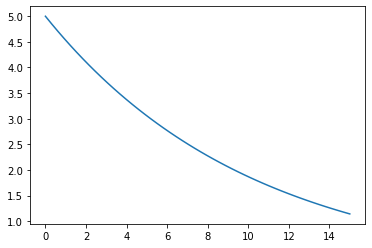

In [4]:
m = GEKKO()
k = 10
y = m.Var(5)
m.Equation(k*y.dt()==-y)
m.time = np.linspace(0,15)
m.options.IMODE=4
m.solve(disp=False)
plt.plot(m.time,y)

## 2: Optimize with Differential Equations

$\min_{u(t)} x_2 \left( t_f \right)$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u$

$\frac{dx_2}{dt}=x_1^2 + u^2$

$x(0) = [1 \; 0]^T$

$t_f=1$

Objective: 0.75567494973


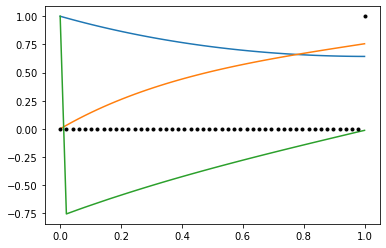

In [37]:
m = GEKKO()
u = m.MV(1); u.STATUS = 1
x1,x2 = m.Array(m.Var,2)
x1.value = 1; x2.value = 0

m.Equations([x1.dt()==u,x2.dt()==x1**2+u**2])
m.time = np.linspace(0,1)

final = np.zeros_like(m.time)
final[-1] = 1
final = m.Param(final)
m.Minimize(x2*final)

m.options.IMODE=6
m.solve(disp=False)
plt.plot(m.time,x1.value)
plt.plot(m.time,x2.value)
plt.plot(m.time,u.value)
plt.plot(m.time,final.value,'k.')
             
print('Objective: ' + str(x2.value[-1]))   

## 3: Optimize with Differential Equations

$\min_{u(t)} x_4 \left( t_f \right)$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=x_2$

$\frac{dx_2}{dt}=-x_3 \, u + 16 \, t - 8$

$\frac{dx_3}{dt}=u$

$\frac{dx_4}{dt}=x_1^2+x_2^2+0.005 \left(x_2 + 16 \, t -8 -0.1x_3\,u^2\right)^2$

$x(0) = [0 \; -1 \; -\sqrt{5} \; 0]^T$

$-4 \le u \le 10$

$t_f=1$

Objective: 0.164202269


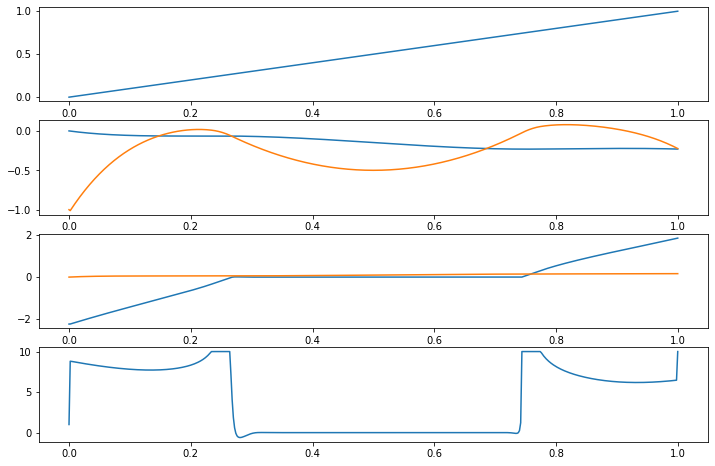

In [3]:
m = GEKKO()
u = m.MV(1,lb=-4,ub=10); u.STATUS = 1; u.DCOST=0
x1,x2,x3,x4,t = m.Array(m.Var,5)
x1.value = 0; x2.value = -1
x3.value = -np.sqrt(5); x4.value = 0
t.value = 0

y = m.Intermediate(16*t-8)
m.Equations([x1.dt()==x2, \
             x2.dt()==-x3*u + y,\
             x3.dt()==u,\
             x4.dt()==x1**2+x2**2+0.005*(x2+y-0.1*x3*u**2)**2,\
             t.dt() ==1])
m.time = np.linspace(0,1,501)

final = np.zeros_like(m.time)
final[-1] = 1
final = m.Param(final)
m.Minimize(x4*final)

m.options.IMODE=6
m.options.NODES=3
m.solve(disp=False)

plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.plot(m.time,t.value)
plt.subplot(4,1,2)
plt.plot(m.time,x1.value)
plt.plot(m.time,x2.value)
plt.subplot(4,1,3)
plt.plot(m.time,x3.value)
plt.plot(m.time,x4.value)
plt.subplot(4,1,4)
plt.plot(m.time,u.value)
             
print('Objective: ' + str(x4.value[-1]))   

## 4: Tubular Reactor with Parallel Reactions

$\max_{u(t)} x_2 \left( t_f \right)$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=-\left(u+0.5u^2\right) x_1$

$\frac{dx_2}{dt}=u \, x_1$

$x(0) = [1 \; 0]^T$

$0 \le u \le 5$

$t_f=1$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,1,nt)

# Parameters
u = m.MV(value=1,ub=5,lb=0)
u.STATUS = 1

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Equations
m.Equation(x1.dt()==-(u+0.5*u**2)*x1)
m.Equation(x2.dt()==u*x1)

# Objective Function
m.Obj(-x2*final)

m.options.IMODE = 6
m.solve()

print('Objective: ' + str(x2[-1]))

plt.figure(1)
plt.plot(m.time,x1.value,'k:',lw=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',lw=2,label=r'$x_2$')
plt.plot(m.time,u.value,'r--',lw=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

## 5: Batch Reactor with Consecutive Reactions A->B->C

$\max_{T(t)} x_2 \left( t_f \right)$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=-k_1 \, x_1^2$

$\frac{dx_2}{dt}=k_1 \, x_1^2 - k_2 \, x_2$

$k_1 = 4000 \, \exp{\left(-\frac{2500}{T}\right)}$

$k_2 = 6.2e5 \, \exp{\left(-\frac{5000}{T}\right)}$

$x(0) = [1 \; 0]^T$

$298 \le T \le 398$

$t_f=1$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,1,nt)

# Parameters
T = m.MV(value=362,ub=398,lb=298)
T.STATUS = 1
T.DCOST = 0

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Intermediates
k1 = m.Intermediate(4000*m.exp(-2500/T))
k2 = m.Intermediate(6.2e5*m.exp(-5000/T))

# Equations
m.Equation(x1.dt()==-k1*x1**2)
m.Equation(x2.dt()==k1*x1**2 - k2*x2)

# Objective Function
m.Obj(-x2*final)

m.options.IMODE = 6
m.solve()

print('Objective: ' + str(x2[-1]))

plt.figure(1)

plt.subplot(2,1,1)
plt.plot(m.time,x1.value,'k:',lw=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',lw=2,label=r'$x_2$')
plt.ylabel('Value')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(m.time,T.value,'r--',lw=2,label=r'$T$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

## 6: Catalytic reactor with A<->B->C

$\max_{u(t)} \left(1 - x_1 \left( t_f \right) - x_2 \left( t_f \right) \right)$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u \left(10 \, x_2 - x_1 \right)$

$\frac{dx_2}{dt}=-u \left(10 \, x_2 - x_1 \right)-\left(1-u\right) x_2$

$x(0) = [1 \; 0]^T$

$0 \le u \le 1$

$t_f=12$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gekko import GEKKO

m = GEKKO()

nt = 101
m.time = np.linspace(0,12,nt)

# Parameters
u = m.MV(value=1,ub=1,lb=0)
u.STATUS = 1
u.DCOST = 0

# Variables
x1 = m.Var(value=1)
x2 = m.Var(value=0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# Equations
m.Equation(x1.dt()==u*(10*x2-x1))
m.Equation(x2.dt()==-u*(10*x2-x1)-(1-u)*x2)

# Objective Function
m.Obj(-final*(1-x1-x2))

m.options.IMODE = 6
m.solve()

print('Objective: ' + str(1-x1[-1]-x2[-1]))

plt.figure(1)

plt.subplot(2,1,1)
plt.plot(m.time,x1.value,'k:',lw=2,label=r'$x_1$')
plt.plot(m.time,x2.value,'b-',lw=2,label=r'$x_2$')
plt.ylabel('Value')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(m.time,u.value,'r-',lw=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')

plt.show()

## 7: Optimal Control with Integral Objective

$\min_u \frac{1}{2} \int_0^2 x_1^2(t) \, dt$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u$

$x_1(0) = 1$

$-1 \le u(t) \le 1$

Objective: 0.16177999031


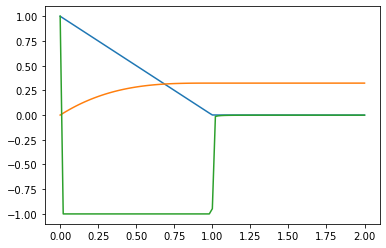

In [49]:
m = GEKKO()
u = m.MV(1,lb=-1,ub=1); u.STATUS = 1
x = m.Var(1)

m.Equation(x1.dt()==u)
m.time = np.linspace(0,2,101)

final = np.zeros_like(m.time)
final[-1] = 1
final = m.Param(final)
y = m.Intermediate(m.integral(x**2))
m.Minimize(0.5*y*final)

m.options.IMODE=6
m.solve(disp=False)
plt.plot(m.time,x.value)
plt.plot(m.time,y.value)
plt.plot(m.time,u.value)
             
print('Objective: ' + str(m.options.OBJFCNVAL))

## 8: Optimal Control with Economic Objective

$\max_{u(t)} \int_0^{10} \left(E-\frac{c}{x}\right) u \, U_{max} \, dt$

$\mathrm{subject \; to}$

$\frac{dx}{dt}=r \, x(t) \left(1-\frac{x(t)}{k}\right)-u \, U_{max}$

$x(0) = 70$

$0 \le u(t) \le 1$

$E=1, \, c=17.5, \, r=0.71$

$k=80.5, \, U_{max}=20$

Optimal Profit: 106.90608335


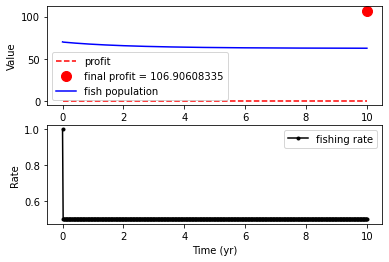

In [6]:
# %load http://apmonitor.com/do/index.php/Main/EconomicDynamicOptimization?action=sourceblock&num=1
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

# create GEKKO model
m = GEKKO()

# time points
n=501
m.time = np.linspace(0,10,n)

# constants
E = 1
c = 17.5
r = 0.71
k = 80.5
U_max = 20

# fishing rate
u = m.MV(value=1,lb=0,ub=1)
u.STATUS = 1
u.DCOST = 0

# fish population
x = m.Var(value=70)

# fish population balance
m.Equation(x.dt() == r*x*(1-x/k)-u*U_max)

# objective (profit)
J = m.Var(value=0)
# final objective
Jf = m.FV()
Jf.STATUS = 1
m.Connection(Jf,J,pos2='end')
m.Equation(J.dt() == (E-c/x)*u*U_max)
# maximize profit
m.Maximize(Jf)

# options
m.options.IMODE = 6  # optimal control
m.options.NODES = 3  # collocation nodes
m.options.SOLVER = 3 # solver (IPOPT)

# solve optimization problem
m.solve()

# print profit
print('Optimal Profit: ' + str(Jf.value[0]))

# plot results
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(m.time,J.value,'r--',label='profit')
plt.plot(m.time[-1],Jf.value[0],'ro',markersize=10,\
         label='final profit = '+str(Jf.value[0]))
plt.plot(m.time,x.value,'b-',label='fish population')
plt.ylabel('Value')
plt.legend()
plt.subplot(2,1,2)
plt.plot(m.time,u.value,'k.-',label='fishing rate')
plt.ylabel('Rate')
plt.xlabel('Time (yr)')
plt.legend()
plt.show()

In [5]:
J.value[-1]

106.90608335

## 9: Optimal Control: Minimize Final Time

$\min_{u(t)} \; t_f$

$\mathrm{subject \; to}$

$\frac{dx_1}{dt}=u$

$\frac{dx_2}{dt}=\cos\left(x_1(t)\right)$

$\frac{dx_3}{dt}=\sin\left(x_1(t)\right)$

$x(0) = \left[\pi/2,4,0\right]$

$x_2\left(t_f\right)=0$

$x_3\left(t_f\right)=0$

$-2 \le u(t) \le 2$

In [ ]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

m = GEKKO()

nt = 501
tm = np.linspace(0,1,nt)
m.time = tm

# Variables
x1 = m.Var(value=np.pi/2.0)
x2 = m.Var(value=4.0)
x3 = m.Var(value=0.0)

p = np.zeros(nt)
p[-1] = 1.0
final = m.Param(value=p)

# FV
tf = m.FV(value=1.0,lb=0.1,ub=100.0)
tf.STATUS = 1

# MV
u = m.MV(value=0,lb=-2,ub=2)
u.STATUS = 1

m.Equation(x1.dt()==u*tf)
m.Equation(x2.dt()==m.cos(x1)*tf)
m.Equation(x3.dt()==m.sin(x1)*tf)

m.Equation(x2*final<=0)
m.Equation(x3*final<=0)

m.Obj(tf)

m.options.IMODE = 6
m.solve()

print('Final Time: ' + str(tf.value[0]))

tm = tm * tf.value[0]

plt.figure(1)
plt.plot(tm,x1.value,'k-',lw=2,label=r'$x_1$')
plt.plot(tm,x2.value,'b-',lw=2,label=r'$x_2$')
plt.plot(tm,x3.value,'g--',lw=2,label=r'$x_3$')
plt.plot(tm,u.value,'r--',lw=2,label=r'$u$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()